**Load The Data**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Exploratory Data Analysis**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


K-Means groups customers like:

High income – High spending

High income – Low spending

Low income – High spending

Low income – Low spending

**Selected Features for Clustering**

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Optimal value for k(Elbow Method) && Clustering Visualization**

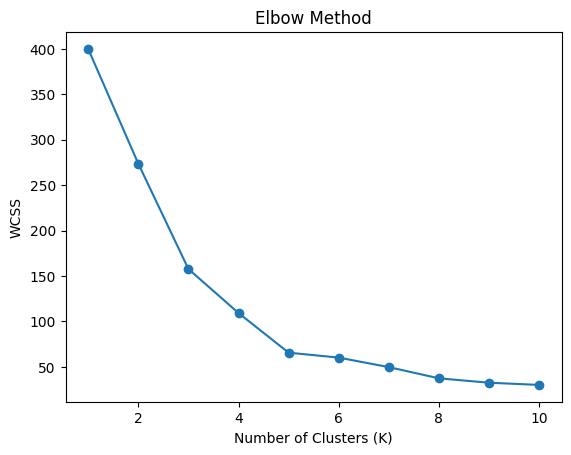

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [13]:
df['Cluster'] = clusters
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


**Visualization**

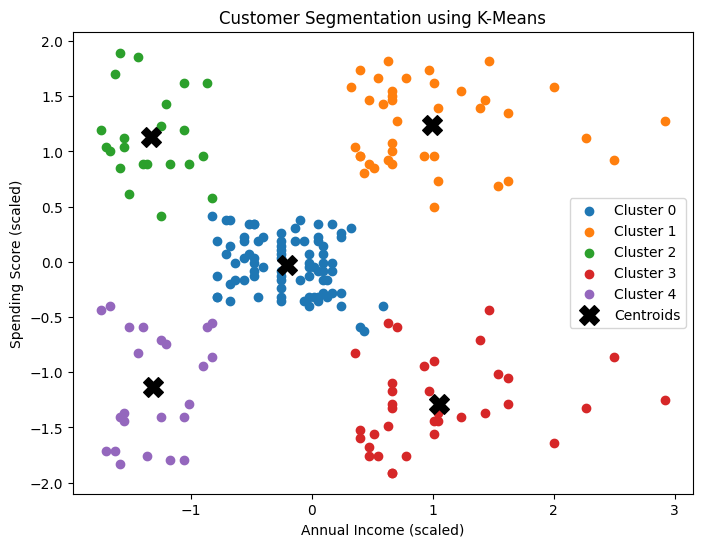

In [14]:
plt.figure(figsize=(8,6))

for i in range(5):
    plt.scatter(
        X_scaled[clusters == i, 0],
        X_scaled[clusters == i, 1],
        label=f'Cluster {i}'
    )

# Centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

**User Input Prediction**

In [16]:
import numpy as np

print("Enter Customer Details:")

income = float(input("Annual Income (k$): "))
spending = float(input("Spending Score (1-100): "))

# Create input array
user_input = np.array([[income, spending]])

# Scale input
user_input_scaled = scaler.transform(user_input)

# Predict cluster
cluster = kmeans.predict(user_input_scaled)

print(f"\nCustomer belongs to Cluster: {cluster[0]}")


Enter Customer Details:
Annual Income (k$): 90
Spending Score (1-100): 85

Customer belongs to Cluster: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
cluster_names = {
    0: "High Income - High Spending (Premium)",
    1: "High Income - Low Spending",
    2: "Average Customers",
    3: "Low Income - Low Spending",
    4: "Low Income - High Spending"
}

print("Customer Segment:", cluster_names[cluster[0]])

Customer Segment: High Income - Low Spending
